In [1]:
import numpy as np #Linear algebra
import pandas as pd #Data processing, # read_csv

In [2]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Libraries for data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("diabetes.csv")
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print('Shape of dataset '+str(data.shape))

Shape of dataset (768, 9)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
data.isnull().sum()

In [9]:
from scipy.stats import skew
for col in data.drop('Outcome', axis = 1).columns:
    print('Skewness of the column {} is {}', (col, str(data[col].skew())))

Skewness of the column {} is {} ('Pregnancies', '0.9016739791518588')
Skewness of the column {} is {} ('Glucose', '0.17375350179188992')
Skewness of the column {} is {} ('BloodPressure', '-1.8436079833551302')
Skewness of the column {} is {} ('SkinThickness', '0.10937249648187608')
Skewness of the column {} is {} ('Insulin', '2.272250858431574')
Skewness of the column {} is {} ('BMI', '-0.42898158845356543')
Skewness of the column {} is {} ('DiabetesPedigreeFunction', '1.919911066307204')
Skewness of the column {} is {} ('Age', '1.1295967011444805')


In [10]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [11]:
for col in data[['Glucose','BloodPressure','SkinThickness','BMI']]:
    data[col] = data[col].fillna(data[col].mean())

In [12]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Data Visualization

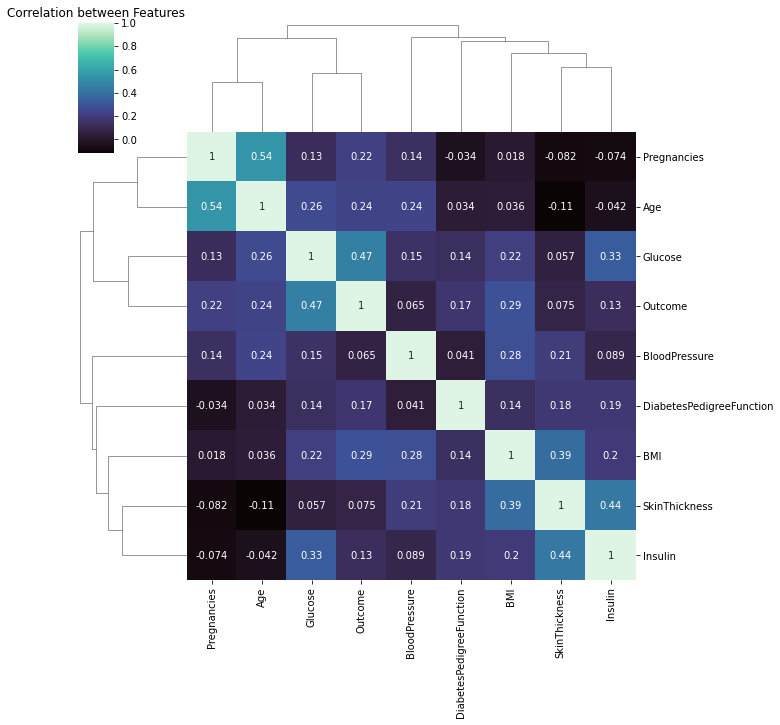

In [13]:
corr_data = data.corr()
sns.clustermap(corr_data,annot = True, cmap= "mako")
plt.title('Correlation between Features')
plt.show()

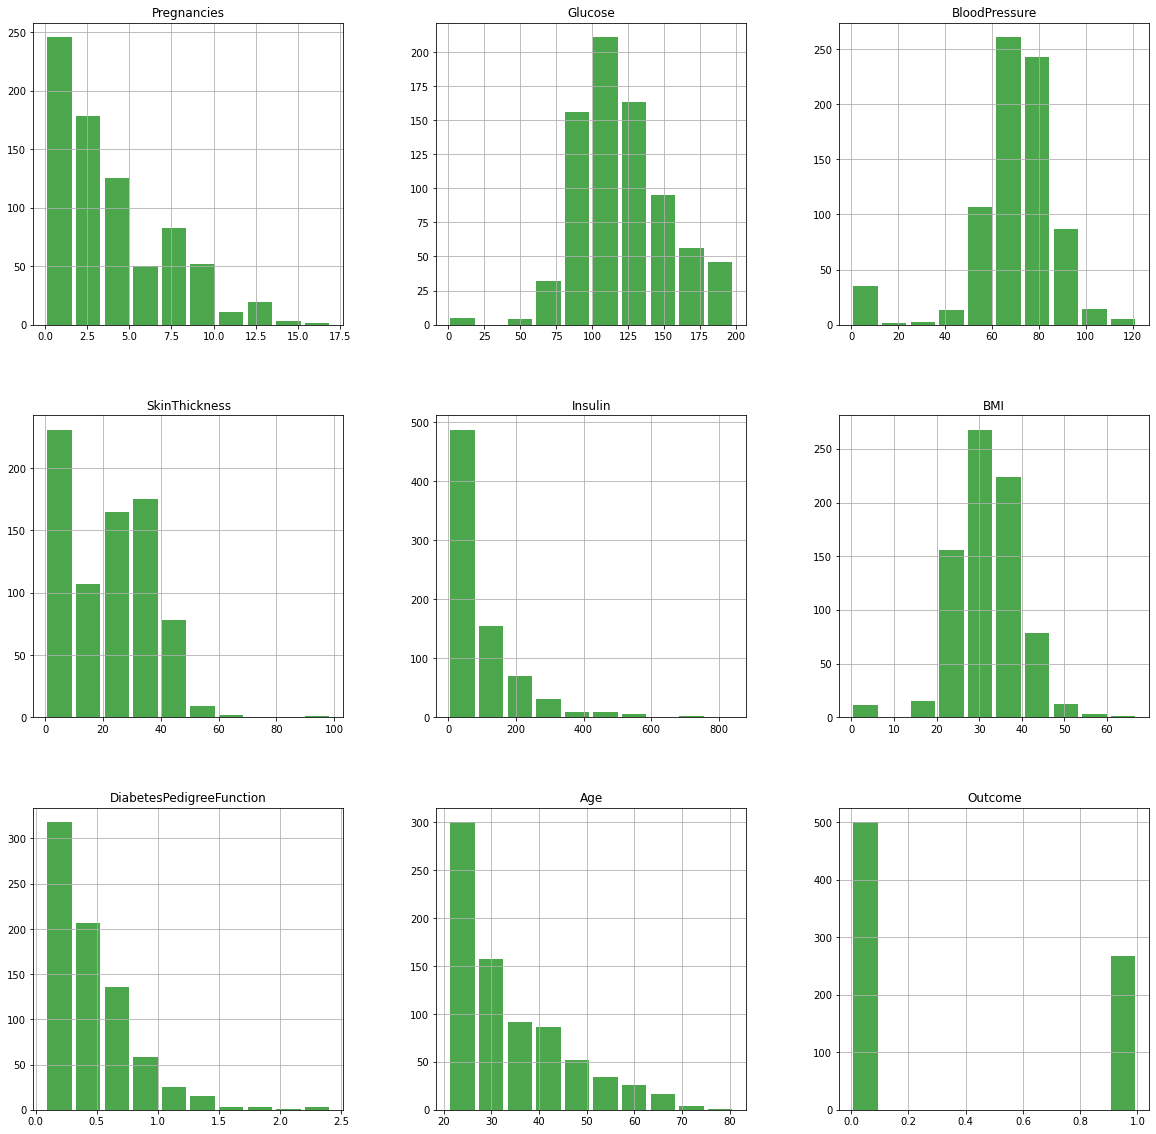

In [14]:
fig = data.hist(figsize= (20,20), color = 'green', alpha = 0.7, rwidth = 0.85)

Text(0.5, 1.0, 'Non-Diabetic vs Diabetic')

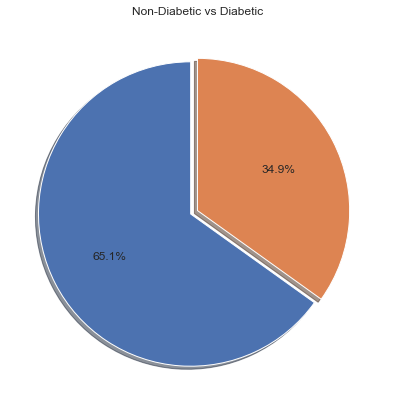

In [15]:
sns.set(style = "whitegrid")
labels = ['Non-Diabetic','Diabetic']
sizes = data['Outcome'].value_counts(sort = True)

explode = (0.05,0)

plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.title('Non-Diabetic vs Diabetic')

In [16]:
def distplot(col_name):
    plt.figure()
    sns.set(style="whitegrid")
    ax = sns.distplot(data[col_name][data.Outcome == 1], color = 'Green', rug = True)
    sns.distplot(data[col_name][data.Outcome == 0], color = 'orange', rug = True)
    plt.legend(['Diabetic','Healthy'])

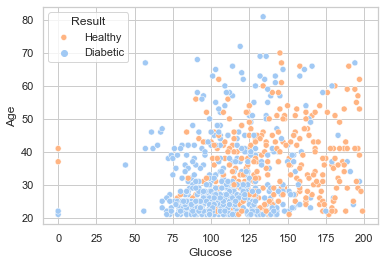

In [17]:
sns.set(style="whitegrid")
g = sns.scatterplot(x = 'Glucose', y= 'Age', data = data, hue= 'Outcome', palette = 'pastel', legend = True)
plt.legend(title = 'Result', loc = 'upper left', labels = ['Healthy','Diabetic'])
plt.show(g)

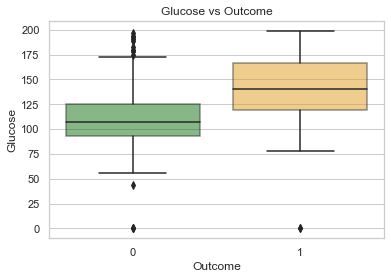

In [18]:
palette = {0: "green", 1: "orange"}
sns.boxplot(x = 'Outcome', y = 'Glucose', boxprops = dict(alpha = 0.5), data = data, palette = palette)
plt.title('Glucose vs Outcome')
plt.show()

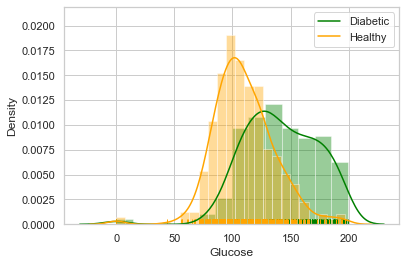

In [19]:
distplot('Glucose')

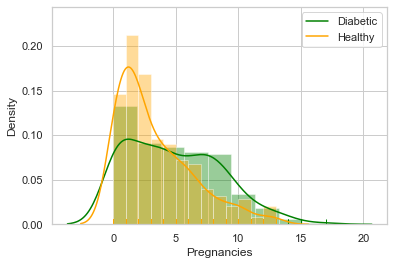

In [20]:
distplot('Pregnancies')

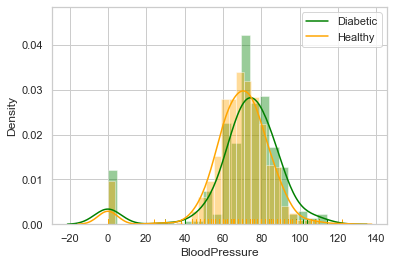

In [21]:
distplot('BloodPressure')

#Train the model

In [22]:
df = data
zero = df[df['Outcome']==0]
one = df[df['Outcome']==1]

In [23]:
#upscaling needs to be performed since only 35% of the data has outcome as 1
from sklearn.utils import resample

#need to increase the minority 1 so that there is no prejudice
df_minority_upsampled = resample(one, replace = True, n_samples = 500)

#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

In [24]:
df.shape

(1000, 9)

#test train split

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import pickle

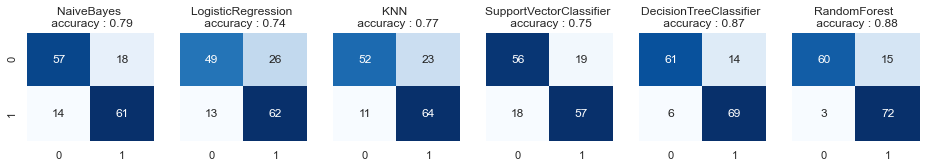

In [31]:
classfiers = {
    "NaiveBayes" : GaussianNB(),
    "LogisticRegression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "SupportVectorClassifier" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
}

accuracy = []
cf_matrix = dict.fromkeys(classfiers.keys())


for key, classifier in classfiers.items():
    model = classifier.fit(X_train,y_train.values.ravel())
    y_pred = model.predict(X_test)
    
    cf_matrix[key] = confusion_matrix(y_test, y_pred)
    accuracy.append('{:.2f}'.format(accuracy_score(y_test,y_pred)))
    
    filename = key + ".sav"
    pickle.dump(classifier, open(filename, "wb"))
    
fig, axn = plt.subplots(1, 6,sharex = True , sharey = True, figsize = (16,2))

for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax = ax, cbar = i == 6, annot = True, cmap = "Blues")
    ax.set_title('{:s} \n accuracy : {:s}'.format(k, accuracy[i], fontsize = 12))
    
    

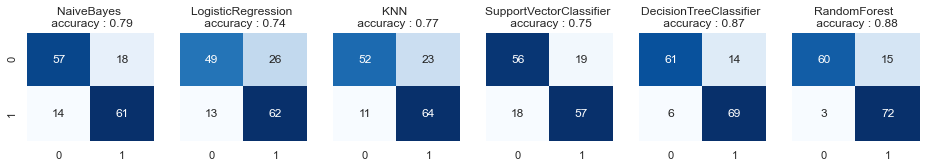

In [32]:
for key, _ in classfiers.items():
    filename = key+".sav"
    loaded_model = pickle.load(open(filename, "rb"))
    y_pred = loaded_model.predict(X_test)
    
    cf_matrix[key] = confusion_matrix(y_test, y_pred)
    accuracy.append('{:.2f}'.format(accuracy_score(y_test,y_pred)))
        
fig, axn = plt.subplots(1, 6,sharex = True , sharey = True, figsize = (16,2))

for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax = ax, cbar = i == 6, annot = True, cmap = "Blues")
    ax.set_title('{:s} \n accuracy : {:s}'.format(k, accuracy[i], fontsize = 12))
    
    

In [33]:
y_pred = model.predict(np.array([[5,166,72,19,175,25.8,0.587,51]]))

In [34]:
y_pred[0]

1